## Logistic Regression

Logistic regression can be used for classification. 

- It is commonly used to estiamte the probability that an instance belongs to a particular class.
- If the estimated probability is grater than a given threshold (typically 50%), then the model predicts that the instance belongs to that class

### Estimating Probabilities

Logistic Functiion = σ(t) = 1 / 1 + e ^(-t)

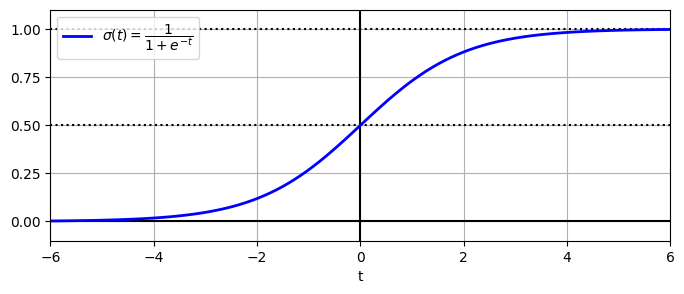

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()

plt.show()

p̂ = ho (x) = σ (θ^T x) ;  p̂ ∈ [0, 1]

- y_hat = 0 (negative class) if  p̂ < 0.5
- y_hat = 1 (positive class) if  p̂ > 0.5

### Training and Cost Function

Training: the objetive is to set the parameter vector θ so that the model estiamtes high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).

- This idea is capture by the cost function:
    - c(θ) = -log (p̂) if y=1
    - c(θ) = -log (1 - p̂) if y = 0

    - This translates into the cost beeing large if the model estimates a probability close to 1 for a negative instance, and close to 0 for a positive instance
    - The cost will be close to 0 otherwise, which is what we want

The cost function (log loss) over the whole training set is the average cost over all training instances.
- When using a log loss, we are assuming that the instances follow a Gaussian distribution around the mean of their class!!! if otherwise, the model can be biased

### Decision Boundaries

In [3]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [11]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [13]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's split the data and train a logisstic regression model on the tranning set

- Logistic regression is used as a binary classifer, positive class = virginica; negative class = otherwise

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm

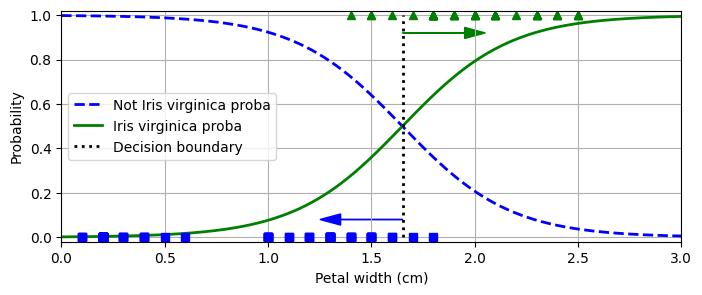

In [16]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")


plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [17]:
decision_boundary

1.6516516516516517

There is a decision boundary at around 1.6 cm where bouth probabilities are equal to 50%. We can see by using predict() instead of predict_proba, which will return the most likely class.

In [18]:
log_reg.predict([[1.66], [1.64]])

array([ True, False])

Let's now display two features: petal width and lenght

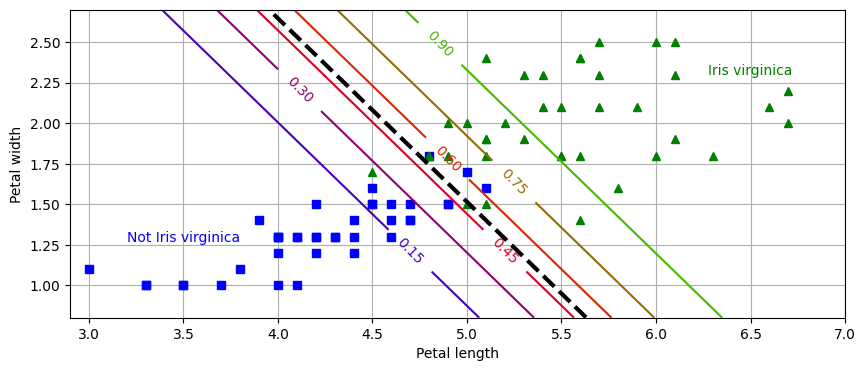

In [19]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()

plt.show()

The dashed line represents the points where the model estimates 50% probability 
 - 50% is the model decision boundary

### SGD on Logistic Regression

In [62]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# We create the logistic regression classifier using SGD; log_loss for logistic regression and penalty='l2' for regularization
sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, tol=1e-5, eta0=0.001, random_state=42)

# Accuracy on cross validation
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')

np.mean(scores)


0.9098484848484848